In [1]:
import os
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
sns.set_style('white')
import dataframe_image as dfi
import pickle
from network_setup import *
from data_setup import *

from EnergyCommunityModel import *
from model_eval import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# set up simulation scope
input_cdir_timestamp = '2022 11 09 10h46m56s'
basepath = os.path.join(os.getcwd(), '02_implementation\energy_model')
with open(os.path.join(basepath,'2022_11_13_filepaths.pickle'), 'rb') as handle:
    paths = pickle.load(handle)
date_t = '2022 12 16 20h00m'
n_steps = 96*7

# define comprehensive scenario settings for analysis
scenario_sc0 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [False]}
scenario_sc1 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_sc2 = {'seasons': ['summer', 'winter'], 'p2p_options': [True], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_dict = {'scenario_0': scenario_sc0, 'scenario_1': scenario_sc1, 'scenario_2': scenario_sc2}

# manually define all scenarios
scenario_0 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_1 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_2 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}
scenario_3 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}

scenario_4 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_5 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_6 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_7 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}

scenario_8 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_9 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_10 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_11 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}

all_scs = [scenario_0, scenario_1, scenario_2, scenario_3, scenario_4, scenario_5, 
           scenario_6, scenario_7, scenario_8, scenario_9, scenario_10, scenario_11]

---

#### Plotting P2P price levels

In [ ]:
# read in mdf...

In [ ]:
# plot p2p price level
l = mdf.price_n_level.tolist()
ind = mdf.index
dfs = []
for i in range(6):
    dfs.append(pd.DataFrame([j[i] for j in l], index=ind))
df = pd.concat(dfs, axis=1)
df.columns = ['price g_s', 'price_n_d (1)', 'price_n_d (2)', 'price_n_d (3)', 'price_n_d (4)', 'price g_d']

fig, ax = plt.subplots(figsize = (22,6))
df.plot(ax = ax, title='P2P trading price level (ct/kWh), summer 2022', color = ['blue', 'grey', 'grey','grey','grey', 'black'])
ax.set_ylabel('ct/kWh')
plt.tight_layout()
plt.show()

---

#### Get overall stability metrics

In [ ]:
mdf = get_quick_mdf(paths, date_t, scenario_dict_sc=scenario_11)
df = calculate_stability_measures(mdf)
df

,net_grid_demand,autarky_level
count,672.00,672.00
mean,-1.01,2.82
std,5.17,8.65
max,31.13,50.81
sum,-680.81,0.00


In [ ]:
# calculate certain measure for certain scenario and save df as png
m_dict = calculate_measure(paths, date_t, scenario_dict=scenario_2, measure='welfare')
#export_measure_calculation(paths, m_dict)

---

#### Benchmark: Effectiveness of P2P trading heuristic
Compare total energy costs with and without p2p trading heuristic

In [48]:
# define p2p trading scenarios and label names
selected_scenarios = [scenario_8, scenario_9, scenario_10, scenario_11]
index_names = ['sc8', 'sc9', 'sc10', 'sc11']

# read in original data with p2p trading heuristic
date_t = '2022 12 16 20h00m'
df_heuristic = get_quick_measure_kpis(paths, date_t, scenarios=selected_scenarios, measure='welfare')

# read in new data without p2p trading heuristic
date_t = '2023 03 08 20h00m'
df_no_heuristic = get_quick_measure_kpis(paths, date_t, scenarios=selected_scenarios, measure='welfare')

# change index labels for both data frames
df_heuristic.index = index_names
df_no_heuristic.index = index_names

# create new dataframe with two columns for heuristic / no heuristic columsn for selected metric
def get_comparison_df(df_heuristic, df_no_heuristic, column = 'total_costs_all'):
    groups = [df_heuristic[column].tolist(), df_no_heuristic[column].tolist()]
    group_labels = ['heuristic', 'no_heuristic']
    
    df_out = pd.DataFrame(groups, index=group_labels).T
    df_out.index = df_heuristic.index
    
    return df_out

graphic interpretation

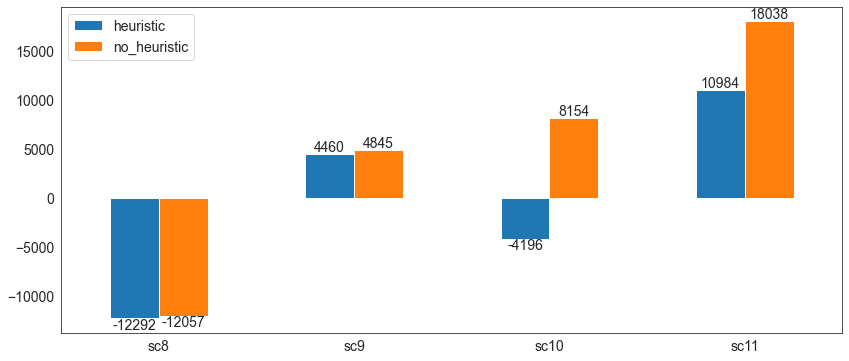

In [50]:
# change mpl font size
matplotlib.rcParams.update({'font.size': 14})

# plot total costs comparison
df = get_comparison_df(df_heuristic, df_no_heuristic, column='total_costs_all')
g = df.plot.bar(figsize = (14,6), rot = 0)
for p in g.containers:
    g.bar_label(p, fmt='%.0f', label_type='edge')
plt.show()

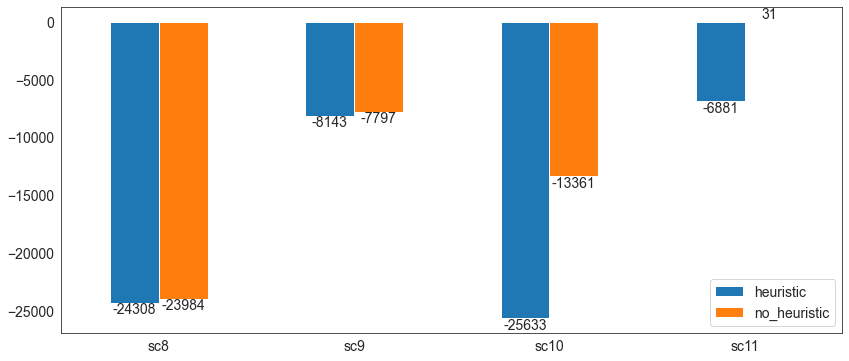

In [51]:
# plot prosumer costs comparison
df = get_comparison_df(df_heuristic, df_no_heuristic, column='total_costs_prosumer')
g = df.plot.bar(figsize = (14,6), rot = 0)
for p in g.containers:
    g.bar_label(p, fmt='%.0f', label_type='edge')
plt.show()

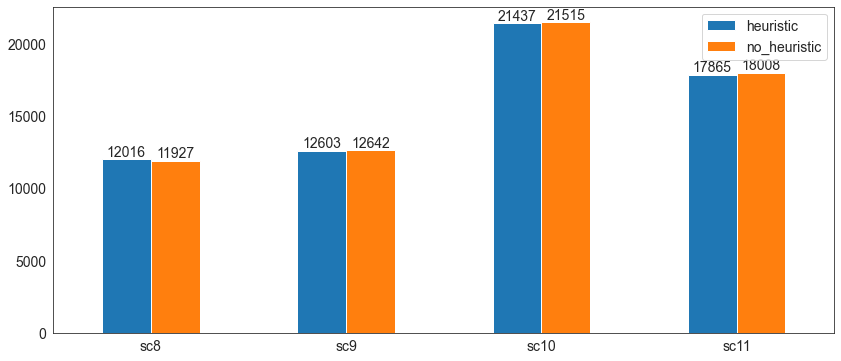

In [52]:
# plot consmer costs comparison
df = get_comparison_df(df_heuristic, df_no_heuristic, column='total_costs_consumer')
g = df.plot.bar(figsize = (14,6), rot = 0)
for p in g.containers:
    g.bar_label(p, fmt='%.0f', label_type='edge')
plt.show()

quantifying benefit of p2p trading heuristic

In [79]:
def compute_absolute_change(df_heuristic, df_no_heuristic, column = 'total_costs_all'):
    df = get_comparison_df(df_heuristic, df_no_heuristic, column=column)
    # subtract heuristic from non-heuristic column to obtain benefit of heuristic
    delta = df.iloc[:,1] - df.iloc[:,0]
    return delta

def compute_relative_change(df_heuristic, df_no_heuristic, column = 'total_costs_all'):
    # compute absolute change
    delta = compute_absolute_change(df_heuristic, df_no_heuristic, column=column)
    # compute percentage change
    return delta / df_heuristic[column].abs()

# applying function to three relevant columns: all, prosumer, and consumer
delta_all = compute_relative_change(df_heuristic, df_no_heuristic, column='total_costs_all')
delta_prosumer = compute_relative_change(df_heuristic, df_no_heuristic, column='total_costs_prosumer')
delta_consumer = compute_relative_change(df_heuristic, df_no_heuristic, column='total_costs_consumer')

In [83]:
delta_all

sc8     0.019144
sc9     0.086319
sc10      2.9433
sc11    0.642223
dtype: object